<a href="https://colab.research.google.com/github/Pratham2012/Python-for-Finance/blob/main/Python_for_Finance_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install riskfolio-lib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 4.1 MB/s 
     |████████████████████████████████| 903 kB 35.4 MB/s 
     |████████████████████████████████| 11.2 MB 50.5 MB/s 
     |████████████████████████████████| 149 kB 61.1 MB/s 
     |████████████████████████████████| 965 kB 56.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import riskfolio as rp

# We add .NS at the end as these companies are listed on the NSE(National Stock Exchange)
companies = ['RELIANCE.NS','TCS.NS','HDFCBANK.NS','ASIANPAINT.NS','PIDILITIND.NS']

#Date range
start = '2018-01-01'
end = '2022-11-16'

data = yf.download(companies,start=start,end=end)['Adj Close']
data.head()

#pct_change() is a built-in method in DataFrame that computes the percent change from one row to another which is exactly what a return is
returns = data.pct_change().dropna()
returns.head()

[*********************100%***********************]  5 of 5 completed


,ASIANPAINT.NS,HDFCBANK.NS,PIDILITIND.NS,RELIANCE.NS,TCS.NS
Date,,,,,
2018-01-02,-0.000787,0.009625,-0.012000,0.001539,-0.005443
2018-01-03,-0.000744,-0.010522,0.027834,0.004006,0.002831
2018-01-04,0.026403,0.003913,-0.009136,0.006012,0.006992
2018-01-05,0.011262,0.001989,0.005079,0.003205,0.012081
2018-01-08,-0.002742,-0.001610,0.002142,0.005741,0.009371


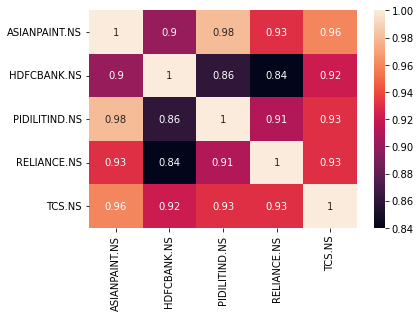

In [ ]:
import seaborn as sns

corr_df = data.corr().round(2) # round to 2 decimal places
fig_corr = sns.heatmap(corr_df,annot=True)

In [ ]:
# Building the portfolio object
port = rp.Portfolio(returns=returns)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

In [ ]:
display(w.T)

,ASIANPAINT.NS,HDFCBANK.NS,PIDILITIND.NS,RELIANCE.NS,TCS.NS
weights,0.176047,9.184886e-07,0.296375,0.184342,0.343235


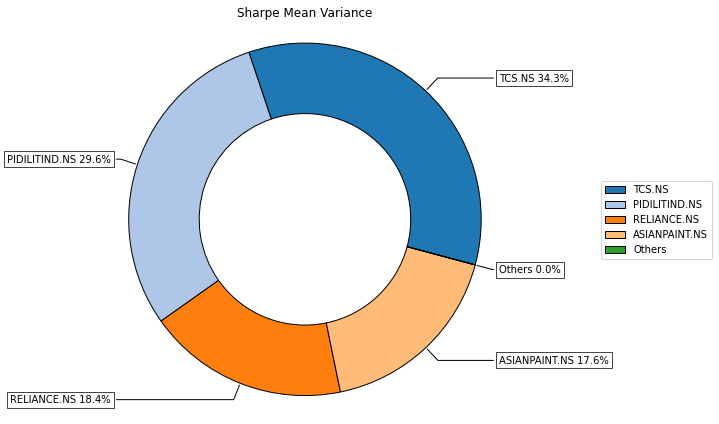

In [ ]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [ ]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,ASIANPAINT.NS,HDFCBANK.NS,PIDILITIND.NS,RELIANCE.NS,TCS.NS
0,0.173188,2.379222e-01,0.192559,0.072330,0.324001
1,0.176322,1.140007e-01,0.244944,0.129259,0.335475
2,0.177644,6.204727e-02,0.266894,0.153109,0.340305
3,0.178670,2.177039e-02,0.283913,0.171619,0.344027
4,0.154509,1.115054e-08,0.318525,0.202907,0.324059


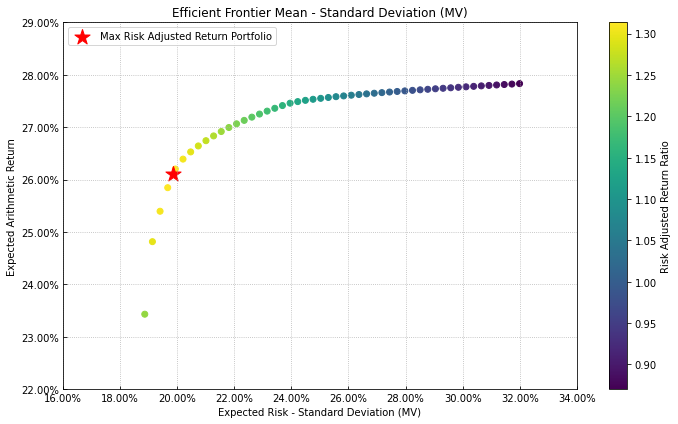

In [ ]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

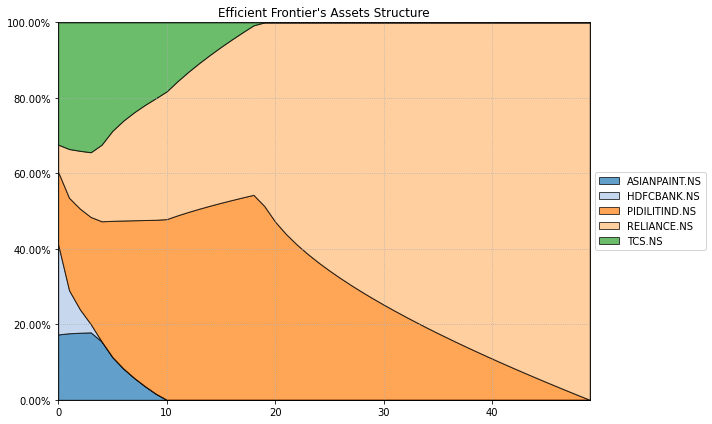

In [ ]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)